In [1]:
#Importing Packages
from matplotlib import pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [2]:
#Defining the ODE
def func(PM,t,k,Se,a,a2,a3,a4,a5,a6):
    P,Pb,Pu,S = PM
    dPdt = 1 - ((k*Se)/a)*P - S*P + Pb
    dPbdt = ((k*Se)/a)*a3*P + a3*S*P - a3*Pb - Pb
    dPudt = Pb - a6*Pu
    dSdt = -a2*S*P + a2*Pb + (a2/a3)*Pb - (a4*S)/(a5+S)
    dydt = [dPdt, dPbdt, dPudt, dSdt]
    return dydt

In [3]:
#Defining Dimensional Variables
a = 1
Ap = 314
j = 10**2
Kd = 0.74
Km = 2.5
k = j/Kd
vm = 8.8 * 10**3
V = 523
W = 32
y = 0.000083
z = .002

In [4]:
#Defining Nondimensional Variables
a2 = (Ap*y*k)/(a**2*V*W)
a3 = j/a
a4 = (k*vm)/(a**2*V*W)
a5 = (k*Km)/(a*W)
a6 = z/a

In [5]:
#Defining Changing Extracellular Uracil
Se1 = .1
Se2 = .01
Se3 = .1

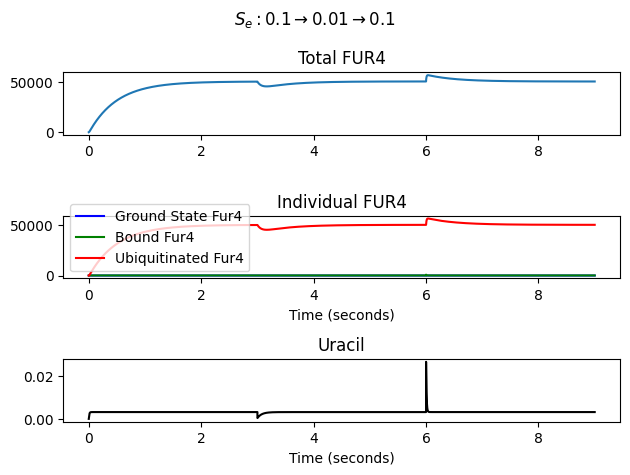

In [6]:
#Running the ODE

#Setting Initial Condition and Timespan
y0 = [0,0,0.042,0]
t1 = np.linspace(0,3000,10000)

#Solving the ODE
sol1 = odeint(func,y0,t1,args = (k,Se1,a,a2,a3,a4,a5,a6))

y0 = sol1[-1,:]
t2 = np.linspace(0,3000,10000)

#Solving the ODE
sol2 = odeint(func,y0,t2,args = (k,Se2,a,a2,a3,a4,a5,a6))

y0 = sol2[-1,:]
t3 = np.linspace(0,3000,10000)

#Solving the ODE
sol3 = odeint(func,y0,t3,args = (k,Se3,a,a2,a3,a4,a5,a6))

t_span = np.hstack([t1,t2+3000,t2+6000]) * 10**(-3)
sol_tot = np.vstack([sol1,sol2,sol3])

#Plotting the Solution
fig, ax = plt.subplots(3,1)

ax[0].plot(t_span,sol_tot[:,0]+sol_tot[:,1]+sol_tot[:,2])
ax[0].set_title("Total FUR4")
ax[1].set_xlabel("Time (seconds)")

ax[1].plot(t_span,sol_tot[:,0],'b',label = "Ground State Fur4")
ax[1].plot(t_span,sol_tot[:,1],'g',label = "Bound Fur4")
ax[1].plot(t_span,sol_tot[:,2],'r',label = "Ubiquitinated Fur4")
ax[1].set_xlabel("Time (seconds)")
ax[1].legend()
ax[1].set_title("Individual FUR4")

ax[2].plot(t_span,sol_tot[:,3],'k',label = "Intracellullar Uracil")
ax[2].set_xlabel("Time (seconds)")
ax[2].set_title("Uracil")

plt.suptitle(fr"$S_e: {Se1}\rightarrow{Se2}\rightarrow{Se3}$")
plt.tight_layout()
plt.show()